#### **Logistic Regression from Scratch**

##### **Import Important Libraries**

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os

##### **Grab The Dataset**

Shapes of Arrays :
Training Set X : (12288, 209)
Training Set Y : (209,)
Test Set X : (12288, 50)
Test Set Y : (50,)


##### **Supporting Functions**

In [2]:
def Sigmoid (z) :
    return 1/(1 + np.exp (-z))

##### **Initialize Weight Vector**

##### **Forward and Backward Propagation**

In [9]:
def Propogate (trainX, trainY, epochs, learningRate, weights, bias) :
    m = len (trainY)
    costs = []

    while epochs != 0 :
        epochs = epochs - 1
        z = np.dot (weights, trainX) + bias
        a = Sigmoid (z)
        weights, bias, cost = GradientDescent (a, trainY, weights, bias, learningRate)
        costs.append (cost)
    return weights, bias, costs

##### **Gradient Descent**

In [10]:
def GradientDescent (a, trainY, weights, bias, learningRate) :
    m = len (trainY)
    
    cost_0 = np.dot (np.matrix (trainY), (np.log (a).T))
    cost_1 = np.dot ((1 - np.matrix (trainY)), np.matrix (np.log (1 - a).T))
    cost = -1/m * (cost_0 + cost_1)

    dcost_dz =  (1/m * (a - trainY))
    dcost_dw = np.matrix (1/m * np.dot (trainX, dcost_dz.T))
    dcost_db = 1/m * np.sum (dcost_dz)

    weights = weights - learningRate * dcost_dw.T
    bias = bias - learningRate * dcost_db
    
    return weights, bias, cost

##### **Start Training**

In [11]:
def Train (trainX, trainY, epochs = 2000, learningRate = 0.05) :
    
    weights = np.matrix (np.zeros (trainX.shape [0]))
    bias = 0
    
    weights, bias, costs = Propogate (trainX, trainY, epochs, learningRate, weights, bias)
    return weights, bias, costs

In [19]:
def GetDataset (debug = False) :
    train_catvnoncat = h5py.File (os.path.join ("datasets", "train_catvnoncat.h5"), 'r')
    test_catvnoncat = h5py.File (os.path.join ("datasets", "test_catvnoncat.h5"), 'r')

    trainX = np.array (train_catvnoncat ['train_set_x'])
    trainX = trainX.reshape ([trainX.shape [0], -1]).T
    trainX = trainX / 255
    trainY = np.array (train_catvnoncat ['train_set_y'])

    testX = np.array (test_catvnoncat ['test_set_x'])
    testX = testX.reshape ([testX.shape [0], -1]).T
    testX = testX / 255
    testY = np.array (test_catvnoncat ['test_set_y'])
    
    if debug == True :
        print ("Shapes of Arrays :")
        print ("Training Set X : " + str (trainX.shape))
        print ("Training Set Y : " + str (trainY.shape))
        print ("Test Set X : " + str (testX.shape))
        print ("Test Set Y : " + str (testY.shape))
        
    return trainX, trainY, testX, testY

In [20]:
trainX, trainY, testX, testY = GetDataset (debug = True)
weights, bias, costs = Train (trainX, trainY, epochs = 210000, learningRate = 0.055)

Shapes of Arrays :
Training Set X : (12288, 209)
Training Set Y : (209,)
Test Set X : (12288, 50)
Test Set Y : (50,)


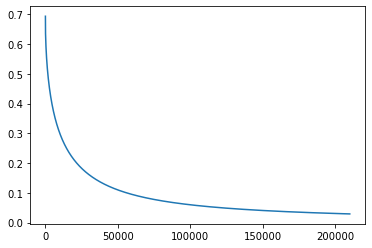

In [22]:
x = np.arange (0, 210000, 1)
costs = np.squeeze (costs)

plt.plot (x, np.squeeze (costs))

##### **Make Predictions**

In [24]:
yPred = Sigmoid (np.dot (weights, testX) + bias)
total = yPred.size
testY = np.matrix (testY)

count = 0
for i in range (0, yPred.size) :
    if (yPred [0, i] > 0.5) == (testY [0, i] == 1) :
        count = count + 1

print ("Accuracy Percentage : ", count/total * 100)

Accuracy Percentage :  70.0
